# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW2 The Perceptron** (20 pt)


In [2]:
# Get the datasets
!curl.exe --output test.dat http://huang.eng.unt.edu/CSCE-5218/test.dat
!curl.exe --output train.dat http://huang.eng.unt.edu/CSCE-5218/train.dat


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2844  100  2844    0     0  61826      0 --:--:-- --:--:-- --:--:-- 63200
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 37 11244   37  4173    0     0   113k      0 --:--:-- --:--:-- --:--:--  113k
100 11244  100 11244    0     0   288k      0 --:--:-- --:--:-- --:--:--  288k


In [3]:
# Take a peek at the datasets
import pandas
train = pandas.read_table('train.dat')
train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,Unnamed: 13
0,1,1,0,0,0,0,0,0,1,1,0,0,1,0
1,0,0,1,1,0,1,1,0,0,0,0,0,1,0
2,0,1,0,1,1,0,1,0,1,1,1,0,1,1
3,0,0,1,0,0,1,0,1,0,1,1,1,1,0
4,0,1,0,0,0,0,0,1,1,1,1,1,1,0


In [4]:
test = pandas.read_table('test.dat')
test.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13
1,1,1,1,0,0,1,1,0,0,0,1,1,0
0,0,0,1,0,0,1,1,0,1,0,0,1,0
0,1,1,1,0,1,1,1,1,0,0,0,1,0
0,1,1,0,1,0,1,1,1,0,1,0,1,0
0,1,0,0,0,1,0,1,0,1,0,0,1,0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [10]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    return sum([array1[i]*array2[i] for i in range(len(array1))])


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    return 1/(1+math.exp(-x))

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model 
    return sigmoid(dot_product(weight, instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    if output(weights, instance) >= 0.5:
        return 1
    else:
        return 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    #Weight Initialization: initialize weights=zero for each instance. 
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            #Dot Product For Input: input the array of weights = 0 and each instance. This will be put in the activation
            #function
            in_value = dot_product(weights, instance)
            #Activation function: apply the sigmoid function to the dot product. 
            output = sigmoid(in_value)
            #Find Error: compare the output to its corresponding input to calculate any error
            error = instance[-1] - output
            #TODO: name these steps
            #Weight Updates: weights will be updated to have new values based on the error and learning rate
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [6]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




In train_perceptron we are still tuning the model and are not ready to make predictions yet. For starters, the predict function needs an argument for the ideal weights that were calculated when training, which we obviously don't have when calling the training function. Furthermore, while the predict function uses some of the same mathematical commands, it goes on to classifying that output by turning anything above 0.5 to 1 and anything less to 0. Whereas in the train_perceptron function we need the actual value of the calculated output to find the error and update the weights.

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [7]:
tr_percent = [5, 10, 25, 50, 75, 100]
num_epochs = [5, 10, 20, 50, 100]
lr = [0.005, 0.01, 0.05]
acc = [] #creating this only for my graph

for p in tr_percent:
    for e in num_epochs:
        for l in lr:
            weights = train_perceptron(instances_tr[:round((len(instances_tr)*(p*0.01)))], l, e)
            accuracy = get_accuracy(weights, instances_te)
            acc.append(accuracy)
            print(f"#tr: {round(len(instances_tr)*(p*0.01)):3}, epochs: {e:3}, learning rate: {l:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}") 

#tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



Text(0.5, 0, 'Learning Rate')

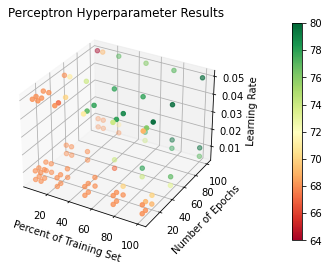

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = []
y = []
z = []

for p in tr_percent:
    for e in num_epochs:
        for l in lr:
            x.append(p)
            y.append(e)
            z.append(l)
            
results = ax.scatter(x,y,z,c=acc, cmap=cm.RdYlGn)
fig.colorbar(results, pad=0.2)

plt.title('Perceptron Hyperparameter Results')
ax.set_xlabel('Percent of Training Set')
ax.set_ylabel('Number of Epochs')
ax.set_zlabel('Learning Rate')

### 3A.

As seen in the scatter plot, the model generally does better with a larger training set. It performs best with either or both values for epochs and learning rate are high. This can also be seen in the results from question 2. There were four occurrences of the highest accuracy of 80%, which all had a larger training set, a large number of epochs, and/or a higher learning rate.  

### 3B.

The learning rate plays a big part in obtaining a higher accuracy. If the learning rate is smaller it takes a lot longer for the model to converge and reach a higher accuracy. Both lines only have 20 epochs, which is probably plenty for a learning rate of 0.05, but for a learning rate that is 10% as small we are taking smaller steps and it is likely that 20 epochs is not enough for the model to converge or even come close. 

### 3C

In [9]:
tr_percent = [50, 75, 100]
num_epochs = [150, 200, 250, 300]
lr = [0.005, 0.01, 0.05, 0.08, 0.1]
acc = [] #creating this only for my graph

for p in tr_percent:
    for e in num_epochs:
        for l in lr:
            weights = train_perceptron(instances_tr[:round((len(instances_tr)*(p*0.01)))], l, e)
            accuracy = get_accuracy(weights, instances_te)
            acc.append(accuracy)
            print(f"#tr: {round(len(instances_tr)*(p*0.01)):3}, epochs: {e:3}, learning rate: {l:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}") 

#tr: 200, epochs: 150, learning rate: 0.005; Accuracy (test, 100 instances): 77.0
#tr: 200, epochs: 150, learning rate: 0.010; Accuracy (test, 100 instances): 78.0
#tr: 200, epochs: 150, learning rate: 0.050; Accuracy (test, 100 instances): 76.0
#tr: 200, epochs: 150, learning rate: 0.080; Accuracy (test, 100 instances): 76.0
#tr: 200, epochs: 150, learning rate: 0.100; Accuracy (test, 100 instances): 76.0
#tr: 200, epochs: 200, learning rate: 0.005; Accuracy (test, 100 instances): 78.0
#tr: 200, epochs: 200, learning rate: 0.010; Accuracy (test, 100 instances): 78.0
#tr: 200, epochs: 200, learning rate: 0.050; Accuracy (test, 100 instances): 77.0
#tr: 200, epochs: 200, learning rate: 0.080; Accuracy (test, 100 instances): 76.0
#tr: 200, epochs: 200, learning rate: 0.100; Accuracy (test, 100 instances): 76.0
#tr: 200, epochs: 250, learning rate: 0.005; Accuracy (test, 100 instances): 78.0
#tr: 200, epochs: 250, learning rate: 0.010; Accuracy (test, 100 instances): 78.0
#tr: 200, epochs

I wanted to try increasing the number of epochs even higher and adding larger learning rates as well to test if any of those combinations would yield a higher accuracy. It appears with just these 3 hyperparameters 80% is the highest accuracy the model can obtain. As far as adding more hyperparameters, I am sure that adding more would make a difference. Whether the difference improves or worsens the accuracy I am unsure about. I saw something called "momentum" that helps prevent oscillations and helps identify the direction of the next step. This seems like it would speed up the process, but as far as increasing the accuracy I don't think it would do much. Overall, if the model has reached its convergence I am not sure if simply adding more hyperparameters will increase that accuracy. I would think it would then depend on a change in data. 

### 3D

It isn't always necessarily better to use more epochs while keeping everything else the same. Eventually with enough epochs the model will converge with its current hyperparameters and reach its highest potential. At this point, adding more epochs will not make a difference and will just cause the training to take longer. However, if you change other hyperparameters then adding more epochs could make a difference.